In [196]:
#Imports
import pandas as pd
import geopandas as gpd
from geopandas.tools import geocode
import requests
import geojson

import matplotlib
%matplotlib inline
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import shapely.speedups
import folium
import contextily as ctx
from pyproj import CRS

import osmnx as ox
import networkx as nx

import contextily as ctx
import mplleaflet

In [253]:
etasonAlueet = gpd.read_file("Lahtotiedot/Erikoistason_alueet_shp-export/HKRPTY_esteettomyys_erikois_alue_areas.shp")

In [254]:
print("Aineistossa on ", len(etasonAlueet), " riviä")
print(etasonAlueet.iloc[0:1]['geometry'])

Aineistossa on  72  riviä
0    POLYGON ((25506632.826 6677060.280, 25506711.7...
Name: geometry, dtype: geometry


In [255]:
etasonReitit = gpd.read_file("Lahtotiedot/Erikoistason_reitti_toteutunut/HKRPTY_esteettomyys_TOT_erikois_reitti_lines.shp")

In [256]:
print("Aineistossa on ", len(etasonReitit), " riviä")
etasonReitit.head()
etasonReitit.crs

Aineistossa on  868  riviä


{'init': 'epsg:3879'}

In [257]:
aaniopasteet = gpd.read_file("Lahtotiedot/HELSINKI1_OjalaKi_20191219_160434 (1)/HKRPTY_esteettomyys_TOT_aaniopas_suojat.tab")

In [258]:
print("Aineistossa on ", len(aaniopasteet), " riviä")
aaniopasteet.head()

Aineistossa on  351  riviä


gml_id  tunniste   luokka1  \
0  HKRPTY_esteettomyys_TOT_aaniopas_suojat.1329         0  Suojatie   
1  HKRPTY_esteettomyys_TOT_aaniopas_suojat.1595         0  Suojatie   
2  HKRPTY_esteettomyys_TOT_aaniopas_suojat.1496         0  Suojatie   
3  HKRPTY_esteettomyys_TOT_aaniopas_suojat.1636         0  Suojatie   
4  HKRPTY_esteettomyys_TOT_aaniopas_suojat.4485         0  Suojatie   

     luokka2 lisatieto1  lisatieto2 toteutunut_esteettomyys  \
0  Perustaso    Saareke  Ääniohjaus                           
1  Perustaso             Ääniohjaus                           
2  Perustaso    Saareke  Ääniohjaus                           
3  Perustaso    Saareke  Ääniohjaus                           
4  Perustaso             Ääniohjaus                           

                                            geometry  
0  LINESTRING (25493826.180 6680518.470, 25493798...  
1  LINESTRING (25495099.200 6675162.230, 25495114...  
2  LINESTRING (25493562.120 6677184.470, 25493548...  
3  LINESTRING (25491658.650 6679548.940, 25491644...  
4  LINESTRING (25496965.080 6677438.790, 25496960...

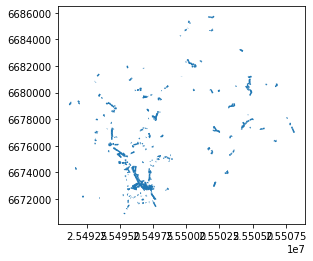

In [259]:
etasonReitit.plot()

In [260]:
print(etasonReitit.crs)
etasonReititWGS84 = etasonReitit.to_crs(epsg=4326)
aaniopasteetWGS84 = aaniopasteet.to_crs(epsg=4326)
etasonAlueetWGS84 = etasonAlueet.to_crs(epsg=4326)

etasonReititWGS84.tail()

{'init': 'epsg:3879'}


/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


gml_id tunniste   luokka1  \
863  HKRPTY_esteettomyys_TOT_erikois_reitti.16820     None  Suojatie   
864  HKRPTY_esteettomyys_TOT_erikois_reitti.16828     None    Reitti   
865  HKRPTY_esteettomyys_TOT_erikois_reitti.15858     None    Reitti   
866  HKRPTY_esteettomyys_TOT_erikois_reitti.15862     None    Reitti   
867  HKRPTY_esteettomyys_TOT_erikois_reitti.16195     None    Reitti   

         luokka2 lisatieto1  lisatieto2 toteutunut  \
863  Erikoistaso    Saareke  Ääniohjaus      Kyllä   
864  Erikoistaso       None        None      Kyllä   
865  Erikoistaso       None        None      Kyllä   
866  Erikoistaso       None        None      Kyllä   
867  Erikoistaso       None        None      Kyllä   

                                              geometry  
863  LINESTRING (25.07630 60.20932, 25.07634 60.20920)  
864  LINESTRING (25.05878 60.19061, 25.05942 60.190...  
865  LINESTRING (24.95509 60.16783, 24.95571 60.167...  
866  LINESTRING (24.95592 60.16921, 24.95668 60.169...  
867  LINESTRING (24.96672 60.20276, 24.96660 60.202...

In [261]:
etasonAlueetWGS84 = etasonAlueetWGS84.rename(
    columns={'TUNNISTE' : 'tunniste', 'LUOKKA1' : 'luokka1',
            'LUOKKA2' : 'luokka2', 'LISATIETO1' : 'lisatieto1',
            'LISATIETO2' : 'lisatieto2'})

In [262]:
etasonAlueetWGS84.head()

gml_id  tunniste luokka1      luokka2        lisatieto1  \
0   None      38.0   Asema  Erikoistaso        Metroasema   
1   None      54.0   Asema  Erikoistaso        Metroasema   
2   None      51.0  Keskus  Erikoistaso  Vuosaaren keskus   
3   None      53.0   Asema  Erikoistaso        Metroasema   
4   None      39.0    None  Erikoistaso              None   

             lisatieto2                 AIKA   TEKIJA  \
0   Rastilan metroasema  2016-10-05T14:35:44  AHellén   
1  Siilitien metroasema  2016-10-05T14:35:44  AHellén   
2                  None  2016-10-05T14:35:44  AHellén   
3  Vuosaaren metroasema  2016-10-05T14:35:44  AHellén   
4                  None  2016-10-05T14:35:44  AHellén   

                                            geometry  
0  POLYGON ((25.11961 60.20627, 25.12104 60.20603...  
1  POLYGON ((25.04348 60.20503, 25.04454 60.20587...  
2  POLYGON ((25.14372 60.20811, 25.14446 60.20827...  
3  POLYGON ((25.14054 60.20736, 25.14398 60.20760...  
4  POLYGON ((25.07641 60.20848, 25.07641 60.20848...

In [263]:
placeName = "keskusta, Helsinki"
polyBorder = Polygon([(24.850000, 60.200000), (24.990000, 60.200000),
                     (24.990000, 60.150000), (24.850000, 60.150000)])
graph = ox.graph_from_bbox(north=60.183715, south=60.160687, east=24.965640, 
                           west=24.917896, network_type='walk')

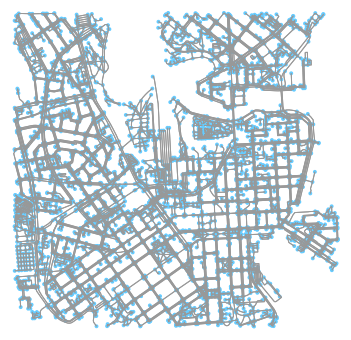

In [164]:
fig, ax = ox.plot_graph(graph)

In [13]:
#graphP = ox.project_graph(graph)

In [264]:
aaniopasteetWGS84 = aaniopasteetWGS84.rename(columns=({'toteutunut_esteettomyys' : 'toteutunut'}))
aaniopasteetWGS84.tail()

gml_id  tunniste   luokka1  \
346  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16190         0  Suojatie   
347  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16191         0  Suojatie   
348  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16192         0  Suojatie   
349  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16193         0  Suojatie   
350  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16194         0  Suojatie   

       luokka2 lisatieto1  lisatieto2 toteutunut  \
346  Perustaso             Ääniohjaus              
347  Perustaso             Ääniohjaus              
348  Perustaso             Ääniohjaus              
349  Perustaso             Ääniohjaus              
350  Perustaso    Saareke  Ääniohjaus              

                                              geometry  
346  LINESTRING (24.96487 60.21506, 24.96496 60.21498)  
347  LINESTRING (24.96475 60.21516, 24.96465 60.21524)  
348  LINESTRING (24.97006 60.21269, 24.97030 60.21262)  
349  LINESTRING (24.97042 60.21260, 24.97058 60.21256)  
350  LINESTRING (24.96844 60.21076, 24.96897 60.21062)

In [209]:
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

In [14]:
edges.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [210]:
print(len(edges))
edges.head()

23208


u           v  key                   osmid  highway  oneway  \
0  3196174340   913578188    0                 8035247  footway   False   
1  3196174340   308783762    0                28788947  footway   False   
2  3196174340   296556313    0                28788947  footway   False   
3  3196174341  3196174350    0  [313613081, 313613084]  service   False   
4   296043616   295064653    0               317591141  footway   False   

   length                                           geometry  \
0   6.557  LINESTRING (24.92952 60.17323, 24.92941 60.17321)   
1   2.043  LINESTRING (24.92952 60.17323, 24.92951 60.17325)   
2  99.141  LINESTRING (24.92952 60.17323, 24.93032 60.172...   
3  16.615  LINESTRING (24.92993 60.17325, 24.92975 60.173...   
4  63.276  LINESTRING (24.93189 60.17067, 24.93254 60.17021)   

             tunnel name service lanes maxspeed bridge access width  ref  \
0               NaN  NaN     NaN   NaN      NaN    NaN    NaN   NaN  NaN   
1               NaN  NaN     NaN   NaN      NaN    NaN    NaN   NaN  NaN   
2               NaN  NaN     NaN   NaN      NaN    NaN    NaN   NaN  NaN   
3  building_passage  NaN     NaN   NaN      NaN    NaN    NaN   NaN  NaN   
4               NaN  NaN     NaN   NaN      NaN    NaN    NaN   NaN  NaN   

  est_width junction  
0       NaN      NaN  
1       NaN      NaN  
2       NaN      NaN  
3       NaN      NaN  
4       NaN      NaN

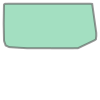

In [211]:
convexHull = edges.unary_union.convex_hull
convexHull

In [212]:
from folium.features import FeatureGroup, GeoJson, TopoJson, Marker

nodesGeoJson = GeoJson(nodes, name="places")
etasonReititGeoJson = GeoJson(etasonReititWGS84, name="etasonReitit")
etasonAlueetGeoJson = GeoJson(etasonAlueetWGS84, name="etasonAlueet")
aaniopasteetGeoJson = GeoJson(aaniopasteetWGS84, name="aaniopasteet")

/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [265]:
etasonReititWGS84 = etasonReititWGS84.loc[(etasonReititWGS84['geometry'].within(convexHull))]
etasonAlueetWGS84 = etasonAlueetWGS84.loc[(etasonAlueetWGS84['geometry'].within(convexHull))]
aaniopasteetWGS84 = aaniopasteetWGS84.loc[(aaniopasteetWGS84['geometry'].within(convexHull))]

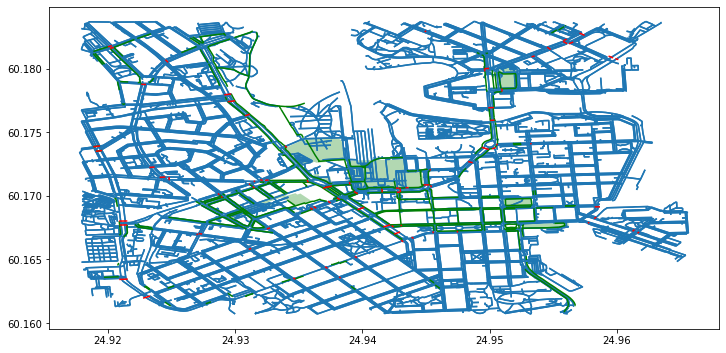

In [266]:
fig, ax = plt.subplots(figsize=(12,12))
edges.plot(ax=ax)
etasonReititWGS84.plot(ax=ax, color='green')
etasonAlueetWGS84.plot(ax=ax, color='green', alpha = 0.3)
aaniopasteetWGS84.plot(ax=ax, color='red')

In [158]:
esteettomyysMap = "Helsingin_keskustan_estettömyys.png"
fig.savefig(esteettomyysMap, dpi=300)

In [171]:
center = convexHull.centroid
center.x


24.941086259162248

In [215]:

from folium.plugins import MarkerCluster, Search
from folium.utilities import parse_options
from folium import plugins
import cgi


In [267]:
etasonReititWGS84 = etasonReititWGS84.to_crs(epsg=3879)
aaniopasteetWGS84 = aaniopasteetWGS84.to_crs(epsg=3879)
etasonAlueetWGS84 = etasonAlueetWGS84.to_crs(epsg=3879)
etasonReititWGS84.head()

/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


gml_id tunniste luokka1  \
1    HKRPTY_esteettomyys_TOT_erikois_reitti.2558     None  Reitti   
39  HKRPTY_esteettomyys_TOT_erikois_reitti.10078     None  Reitti   
40  HKRPTY_esteettomyys_TOT_erikois_reitti.10081     None  Reitti   
41  HKRPTY_esteettomyys_TOT_erikois_reitti.10082     None  Reitti   
42  HKRPTY_esteettomyys_TOT_erikois_reitti.10091     None  Reitti   

        luokka2             lisatieto1 lisatieto2 toteutunut  \
1   Erikoistaso  Ei talvikunnossapitoa       None      Kyllä   
39  Erikoistaso                   None       None      Kyllä   
40  Erikoistaso                   None       None      Kyllä   
41  Erikoistaso                   None       None      Kyllä   
42  Erikoistaso                   None       None      Kyllä   

                                             geometry  
1   LINESTRING (25496827.491 6672981.527, 25496957...  
39  LINESTRING (25495585.415 6674315.651, 25495622...  
40  LINESTRING (25496131.809 6673039.414, 25496140...  
41  LINESTRING (25496145.085 6673047.634, 25496145...  
42  LINESTRING (25496839.152 6672748.389, 25496804...

In [236]:
etasonReititWGS84.crs


{'init': 'epsg:3879', 'no_defs': True}

In [293]:
etasonReititWGS84['bufferareas'] = etasonReititWGS84.geometry.buffer(10.0)

In [299]:
etasonReititWGS84.head()

gml_id tunniste   luokka1  \
0   HKRPTY_esteettomyys_TOT_erikois_reitti.2348     None  Suojatie   
1   HKRPTY_esteettomyys_TOT_erikois_reitti.2558     None    Reitti   
2  HKRPTY_esteettomyys_TOT_erikois_reitti.10000     None    Reitti   
3  HKRPTY_esteettomyys_TOT_erikois_reitti.10001     None    Reitti   
4  HKRPTY_esteettomyys_TOT_erikois_reitti.10002     None    Reitti   

       luokka2             lisatieto1  lisatieto2 toteutunut  \
0  Erikoistaso                Saareke  Ääniohjaus      Kyllä   
1  Erikoistaso  Ei talvikunnossapitoa        None      Kyllä   
2  Erikoistaso                   None        None      Kyllä   
3  Erikoistaso                   None        None      Kyllä   
4  Erikoistaso                   None        None      Kyllä   

                                          linestring  \
0  LINESTRING (24.91604 60.18057, 24.91572 60.18052)   
1  LINESTRING (24.94285 60.16970, 24.94519 60.16974)   
2  LINESTRING (24.85376 60.22658, 24.85365 60.226...   
3  LINESTRING (24.85342 60.22680, 24.85323 60.226...   
4  LINESTRING (24.93648 60.20151, 24.93622 60.20205)   

                                            geometry  
0  POLYGON ((26.52909 50.31153, 25.55399 50.20091...  
1  POLYGON ((24.79987 70.16868, 25.78064 70.13478...  
2  POLYGON ((20.75838 51.10365, 19.74294 51.63124...  
3  MULTIPOLYGON (((21.05617 50.97581, 21.05872 50...  
4  POLYGON ((15.92337 55.86977, 15.54213 56.77404...

In [295]:

#aaniopasteetWGS84['centroid'] = aaniopasteetWGS84['geometry'].centroid

etasonReititWGS84 = etasonReititWGS84.rename(columns={'geometry' : 'linestring', 'bufferareas' : 'geometry'})



In [296]:
etasonReititWGS84 = etasonReititWGS84.set_geometry('geometry')

In [273]:
reittiyhdiste = etasonReititWGS84.unary_union

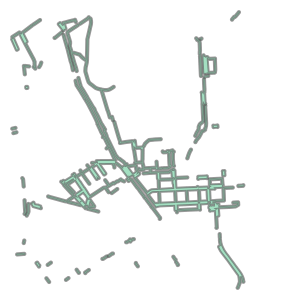

In [274]:
reittiyhdiste

shapely.geometry.multilinestring.MultiLineString

In [275]:
aaniopasteetWGS84['bufferareas'] = aaniopasteetWGS84['geometry'].buffer(10)
aaniopasteetWGS84 = aaniopasteetWGS84.rename(columns={'geometry' : 'linestring', 'bufferareas' : 'geometry'})



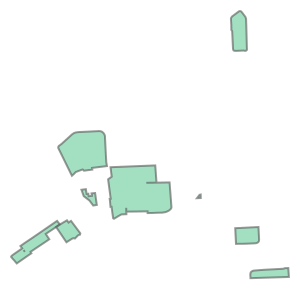

In [276]:
alueyhdiste = etasonAlueetWGS84.unary_union
alueyhdiste

In [277]:
aaniopasteetWGS84 = aaniopasteetWGS84.set_geometry('geometry')

In [278]:
aaniopasteetyhdiste = aaniopasteetWGS84.unary_union



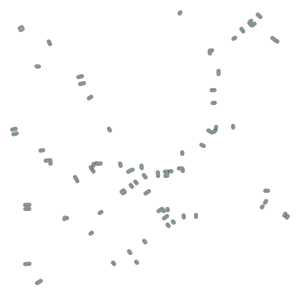

In [279]:
aaniopasteetyhdiste

In [280]:
aaniopasteetWGS84.tail()

gml_id  tunniste   luokka1  \
308  HKRPTY_esteettomyys_TOT_aaniopas_suojat.16469         0  Suojatie   
328  HKRPTY_esteettomyys_TOT_aaniopas_suojat.15835         0  Suojatie   
329  HKRPTY_esteettomyys_TOT_aaniopas_suojat.15836         0  Suojatie   
332  HKRPTY_esteettomyys_TOT_aaniopas_suojat.15847         0  Suojatie   
333  HKRPTY_esteettomyys_TOT_aaniopas_suojat.15848         0  Suojatie   

         luokka2 lisatieto1  lisatieto2 toteutunut  \
308  Erikoistaso             Ääniohjaus              
328    Perustaso             Ääniohjaus              
329    Perustaso             Ääniohjaus              
332    Perustaso             Ääniohjaus              
333    Perustaso             Ääniohjaus              

                                            linestring  \
308  LINESTRING (25497150.360 6673303.990, 25497130...   
328  LINESTRING (25497876.180 6672696.900, 25497868...   
329  LINESTRING (25497658.470 6672781.830, 25497652...   
332  LINESTRING (25497689.400 6672827.970, 25497680...   
333  LINESTRING (25497855.960 6672718.690, 25497847...   

                                              geometry  
308  POLYGON ((25497125.721 6673305.490, 25497124.8...  
328  POLYGON ((25497877.281 6672680.077, 25497876.7...  
329  POLYGON ((25497660.820 6672767.630, 25497660.2...  
332  POLYGON ((25497688.501 6672808.804, 25497687.9...  
333  POLYGON ((25497856.241 6672697.908, 25497855.7...

In [281]:
#etasonReititWGS84 = etasonReititWGS84.drop(['linestring'], axis=1)

In [302]:
etasonReititWGS84 = etasonReitit.to_crs(epsg=4326)
aaniopasteetWGS84 = aaniopasteet.to_crs(epsg=4326)
etasonAlueetWGS84 = etasonAlueet.to_crs(epsg=4326)

etasonReititWGS84.tail()


/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


gml_id tunniste   luokka1  \
863  HKRPTY_esteettomyys_TOT_erikois_reitti.16820     None  Suojatie   
864  HKRPTY_esteettomyys_TOT_erikois_reitti.16828     None    Reitti   
865  HKRPTY_esteettomyys_TOT_erikois_reitti.15858     None    Reitti   
866  HKRPTY_esteettomyys_TOT_erikois_reitti.15862     None    Reitti   
867  HKRPTY_esteettomyys_TOT_erikois_reitti.16195     None    Reitti   

         luokka2 lisatieto1  lisatieto2 toteutunut  \
863  Erikoistaso    Saareke  Ääniohjaus      Kyllä   
864  Erikoistaso       None        None      Kyllä   
865  Erikoistaso       None        None      Kyllä   
866  Erikoistaso       None        None      Kyllä   
867  Erikoistaso       None        None      Kyllä   

                                              geometry  
863  LINESTRING (25.07630 60.20932, 25.07634 60.20920)  
864  LINESTRING (25.05878 60.19061, 25.05942 60.190...  
865  LINESTRING (24.95509 60.16783, 24.95571 60.167...  
866  LINESTRING (24.95592 60.16921, 24.95668 60.169...  
867  LINESTRING (24.96672 60.20276, 24.96660 60.202...

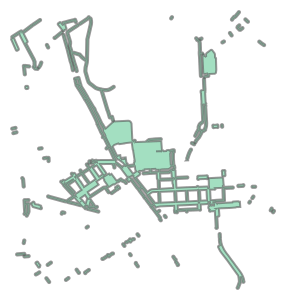

In [283]:
geoms = [aaniopasteetyhdiste, alueyhdiste, reittiyhdiste]
etasonKokoelma = shapely.ops.cascaded_union(geoms)
etasonKokoelma

In [308]:
esteeton = gpd.GeoDataFrame()

In [313]:
esteeton['geometry']= etasonKokoelma

In [316]:
esteeton.crs = CRS.from_epsg(3879)

In [318]:
esteeton = esteeton.to_crs(epsg=4326)

/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [323]:
esteeton.head()

geometry
0  POLYGON ((24.94335 60.16644, 24.94336 60.16644...
1  POLYGON ((24.94582 60.16276, 24.94557 60.16294...
2  POLYGON ((24.93370 60.16332, 24.93424 60.16350...
3  POLYGON ((24.92090 60.16334, 24.92088 60.16334...
4  POLYGON ((24.93843 60.16359, 24.93844 60.16358...

In [322]:

m = folium.Map(location= [center.y, center.x], zoom_start=14, min_zoom = 14, 
               max_zoom= 20, control_scale=True, tiles="CartoDB Positron")

etasonReititGeoJson.add_to(m)
etasonAlueetGeoJson.add_to(m)
aaniopasteetGeoJson.add_to(m)


In [135]:
origAddress = "Pohjoinen rautatiekatu 5, Helsinki"
destAddress = "Esplanadi 1, Helsinki"

# Geocode addresses using Nominatim. Remember to provide a custom "application name"
# in the user_agent parameter!

orig = geocode(origAddress, provider='nominatim', user_agent='autogis_xx', 
               timeout=4)
dest = geocode(destAddress, provider='nominatim', user_agent='autogis_xx', 
               timeout=4)

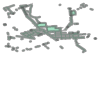

In [326]:
esteetonAluekartalle = esteeton.unary_union
esteetonAluekartalle

In [319]:
esteetonreititGJ = GeoJson(esteeton, name="esteeton_reitti_alue")

/home/vipy/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [329]:





orig_yx = (orig['geometry'].at[0].y, orig['geometry'].at[0].x)
dest_yx = (dest['geometry'].at[0].y, dest['geometry'].at[0].x)

oNearest = ox.get_nearest_node(graph, orig_yx, method='euclidean')
dNearest = ox.get_nearest_node(graph, dest_yx, method='euclidean')

origo = nodes.loc[oNearest]
destination = nodes.loc[dNearest]

odNodes = gpd.GeoDataFrame([origo, destination], geometry='geometry', 
                           crs=nodes.crs)


route = nx.shortest_path(G=graph, source=oNearest, target=dNearest, 
                         weight='length')


path = []
#listX = []
#listY = []

for i in range(len(route)-1):
    point = nodes.loc[route[i]].geometry
    path.append([point.y, point.x])
    

                                 
    
m = folium.Map(location= [path[0][0], path[0][1]], zoom_start=17, min_zoom = 13, 
               max_zoom= 20, control_scale=True, tiles="CartoDB Positron")

etasonReititGeoJson.add_to(m)
etasonAlueetGeoJson.add_to(m)
aaniopasteetGeoJson.add_to(m)

for i in range(len(route)-1):
    pathP = []

    point1 = Point(nodes.loc[route[i]].geometry.x, nodes.loc[route[i]].geometry.y)
    
    point2 = Point(nodes.loc[route[i+1]].geometry.x, nodes.loc[route[i+1]].geometry.y)
    
    pathP.append([nodes.loc[route[i]].geometry.y, nodes.loc[route[i]].geometry.x])
    pathP.append([nodes.loc[route[i+1]].geometry.y, nodes.loc[route[i+1]].geometry.x])
    #print(pathP)
    lineString = LineString([point1, point2])
    if point1.within(esteetonAluekartalle) and point2.within(esteetonAluekartalle):
        plineX = folium.PolyLine(pathP, weight=8, color='green', opacity=0.6).add_to(m)
        print(plineX)
    else:
        plineX = folium.PolyLine(pathP, weight=8, color='red',
                                     opacity=0.6).add_to(m)


#esteetonreititGJ.add_to(m)

m

In [41]:
len(route)

42

In [38]:
m1 = folium.Map(location= [path[0][0], path[0][1]], zoom_start=14, min_zoom = 13, 
               max_zoom= 20, control_scale=True, tiles="CartoDB Positron")
Marker([orig['geometry'].at[0].y, orig['geometry'].at[0].x], popup='Lähtöpaikka', color='green').add_to(m1)
m1.add_child(pline)


NameError: name 'pline' is not defined

In [238]:
path[0][1]

24.9456433

In [179]:
m.save("valitulostus1.html")

In [ ]:
#search_zoom= 18, searchlabel="", collapsed=True, geom_type='GeoJson',, placeholder="Search for an address"